In [15]:
#!pip install "pix2tex[gui]"

# Tried to install on the train, but it didn't work, which is too bad...

  Obtaining dependency information for pix2tex[gui] from https://files.pythonhosted.org/packages/ef/51/e5a49cee59c8632723a18f7b1a5f2d431825f589b12f6d61891ba020d8fb/pix2tex-0.1.2-py3-none-any.whl.metadata
  Obtaining dependency information for munch>=2.5.0 from https://files.pythonhosted.org/packages/56/b3/7c69b37f03260a061883bec0e7b05be7117c1b1c85f5212c72c8c2bc3c8c/munch-4.0.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for opencv-python-headless>=4.1.1.26 from https://files.pythonhosted.org/packages/e3/10/31b27a7473043eb5317f698ede00e7e129b2de378903bfe0bb4d785a7baf/opencv_python_headless-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
  Obtaining dependency information for einops>=0.3.0 from https://files.pythonhosted.org/packages/29/0b/2d1c0ebfd092e25935b86509a9a817159212d82aa43d7fb07eca4eeff2c2/einops-0.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for transformers>=4.18.0 from https://files.pythonhosted.org/packages/20/0a/739426a81f7635b422fbe6cb8d

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\jones\anaconda3\envs\CompEnv\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\jones\anaconda3\envs\CompEnv\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\jones\anaconda3\envs\CompEnv\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\jones\anaconda3\envs\CompEnv\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
           ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jones\anaconda3\envs\CompEnv\Lib\http\client.py", line 466, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\Users\jones\anaconda3\envs\CompEnv\Lib\socket.py", line 

   --------------------------- ------------ 26.1/38.0 MB 112.5 kB/s eta 0:01:46
   --------------------------- ------------ 26.2/38.0 MB 111.6 kB/s eta 0:01:46
   --------------------------- ------------ 26.2/38.0 MB 111.6 kB/s eta 0:01:46
   --------------------------- ------------ 26.2/38.0 MB 111.6 kB/s eta 0:01:46
   --------------------------- ------------ 26.2/38.0 MB 111.6 kB/s eta 0:01:46
   --------------------------- ------------ 26.2/38.0 MB 111.6 kB/s eta 0:01:46
   --------------------------- ------------ 26.2/38.0 MB 111.6 kB/s eta 0:01:46
   --------------------------- ------------ 26.2/38.0 MB 111.6 kB/s eta 0:01:46
   --------------------------- ------------ 26.2/38.0 MB 111.2 kB/s eta 0:01:47
   --------------------------- ------------ 26.2/38.0 MB 111.2 kB/s eta 0:01:47
   --------------------------- ------------ 26.2/38.0 MB 111.2 kB/s eta 0:01:47
   --------------------------- ------------ 26.2/38.0 MB 111.3 kB/s eta 0:01:46
   --------------------------- ---------

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from matplotlib import colormaps as cmaps
from matplotlib.ticker import MultipleLocator

cm = cmaps['tab10']
directory = r"C:/Users/jones/Documents/Atto/Calculations/Tests/1DH/"
intensities = ["E12", "E13", "E14", "E15"]
omega = 0.057 #This corresponds to around 800nm driving field
Dirs = ['Mask/','NoMask/'] #Whether or not I have used a mask function for computing ionisation channels
ions = 'td.general/ion_ch'
laser = 'td.general/laser'
Widths = ['Width25', 'Width50', 'Width75', 'Width100' ]
Radii = ['Rad100/', 'Rad200/', 'Rad300/', 'Rad400/', 'Rad500/' ] 


Let's just begin by going over once again the defining properties of TDDFT:

So for time dependent electronic orbitals $\psi_{j}(t)$

$$i\frac{\partial}{\partial t}\psi_{j}(t) = H(t)\psi_{j}(t)$$

$$\psi_{j}(t=0) = \psi_{j}^{(0)}$$

This needs to be evaluated via the linear time evolution operator, $(T,t)$ which transforms the state vector into a solution at time T. Therefore:

$$\psi_{j}(T) = \mathcal{T}exp \Biggl\{ -i \int_{0}^{T} d\tau H(\tau)  \Biggr\} \psi_{j}^{(0)}$$

In [47]:
def dict_files_mask(radius = '0', file_ext = 'nul.txt', col = False):
    if 'multi' in file_ext:
        col = int(col)
        location = directory+'/Mask/Rad'+radius+'/'
        
        dict = {}
        for width in Widths:
            dict[width] = {}
            for intensity in intensities:
                dict[width][intensity] = np.loadtxt(location + width + '/' + intensity + '/' + file_ext)[:,col]
        
    else:   
        location = directory+'/Mask/Rad'+radius+'/'
        
        dict = {}
        for width in Widths:
            dict[width] = {}
            for intensity in intensities:
                dict[width][intensity] = np.loadtxt(location + width + '/' + intensity + '/' + file_ext)
    return dict


In [36]:
print(sisyphus_path)

C:\Users\jones\Documents\Atto\Calculations\Tests\1DH


In [49]:
harm_spec = dict_files_mask('200', 'hs-mult.x')
ion_chans = dict_files_mask('200',  'td.general/ion_ch')
energies = dict_files_mask('200',  'td.general/energy')
multipoles = dict_files_mask('200', 'td.general/multipoles[:,2]'
charges = dict_files_mask('200',  td.general/multipoles[:,1]
acceleration = dict_files_mask('200', td.general/acceleration

C:/Users/jones/Documents/Atto/Calculations/Tests/1DH//Mask/Rad200/


In [13]:
harm_spec = {} #hs-mult.x
ion_chans = {} #td.general/ion_ch
energies = {} #td.general/energy
multipoles = {} #td.general/multipoles[:,2]
charges = {}  #td.general/multipoles[:,1]
acceleration = {} #td.general/acceleration
# Directory path

# Populate dictionaries with data
for width in Widths:
    harm_spec[width] = {}
    ion_chans[width] = {}
    energies[width] = {}
    multipoles[width] = {}
    charges[width] = {}
    acceleration[width] = {}
    for intensity in intensities:
        # File path
        file_path = os.path.join(directory, f"{intensity}.txt")
        
        # Populate dictionaries
        harm_spec[width][intensity] = np.loadtxt(sisyphus_path+'/Mask/Rad200/'+width+'/'+intensity+'/hs-mult.x')
        ion_chans[width][intensity] = np.loadtxt(sisyphus_path+'/Mask/Rad200/'+width+'/'+intensity+'/td.general/ion_ch')
        energies[width][intensity] = np.loadtxt(sisyphus_path+'/Mask/Rad200/'+width+'/'+intensity+'/td.general/energy')
        multipoles[width][intensity] = np.loadtxt(sisyphus_path+'/Mask/Rad200/'+width+'/'+intensity+'/td.general/multipoles')[:,2]
        charges[width][intensity] = np.loadtxt(sisyphus_path+'/Mask/Rad200/'+width+'/'+intensity+'/td.general/multipoles')[:,1]
        acceleration[width][intensity] = np.loadtxt(sisyphus_path+'/Mask/Rad200/'+width+'/'+intensity+'/td.general/acceleration')


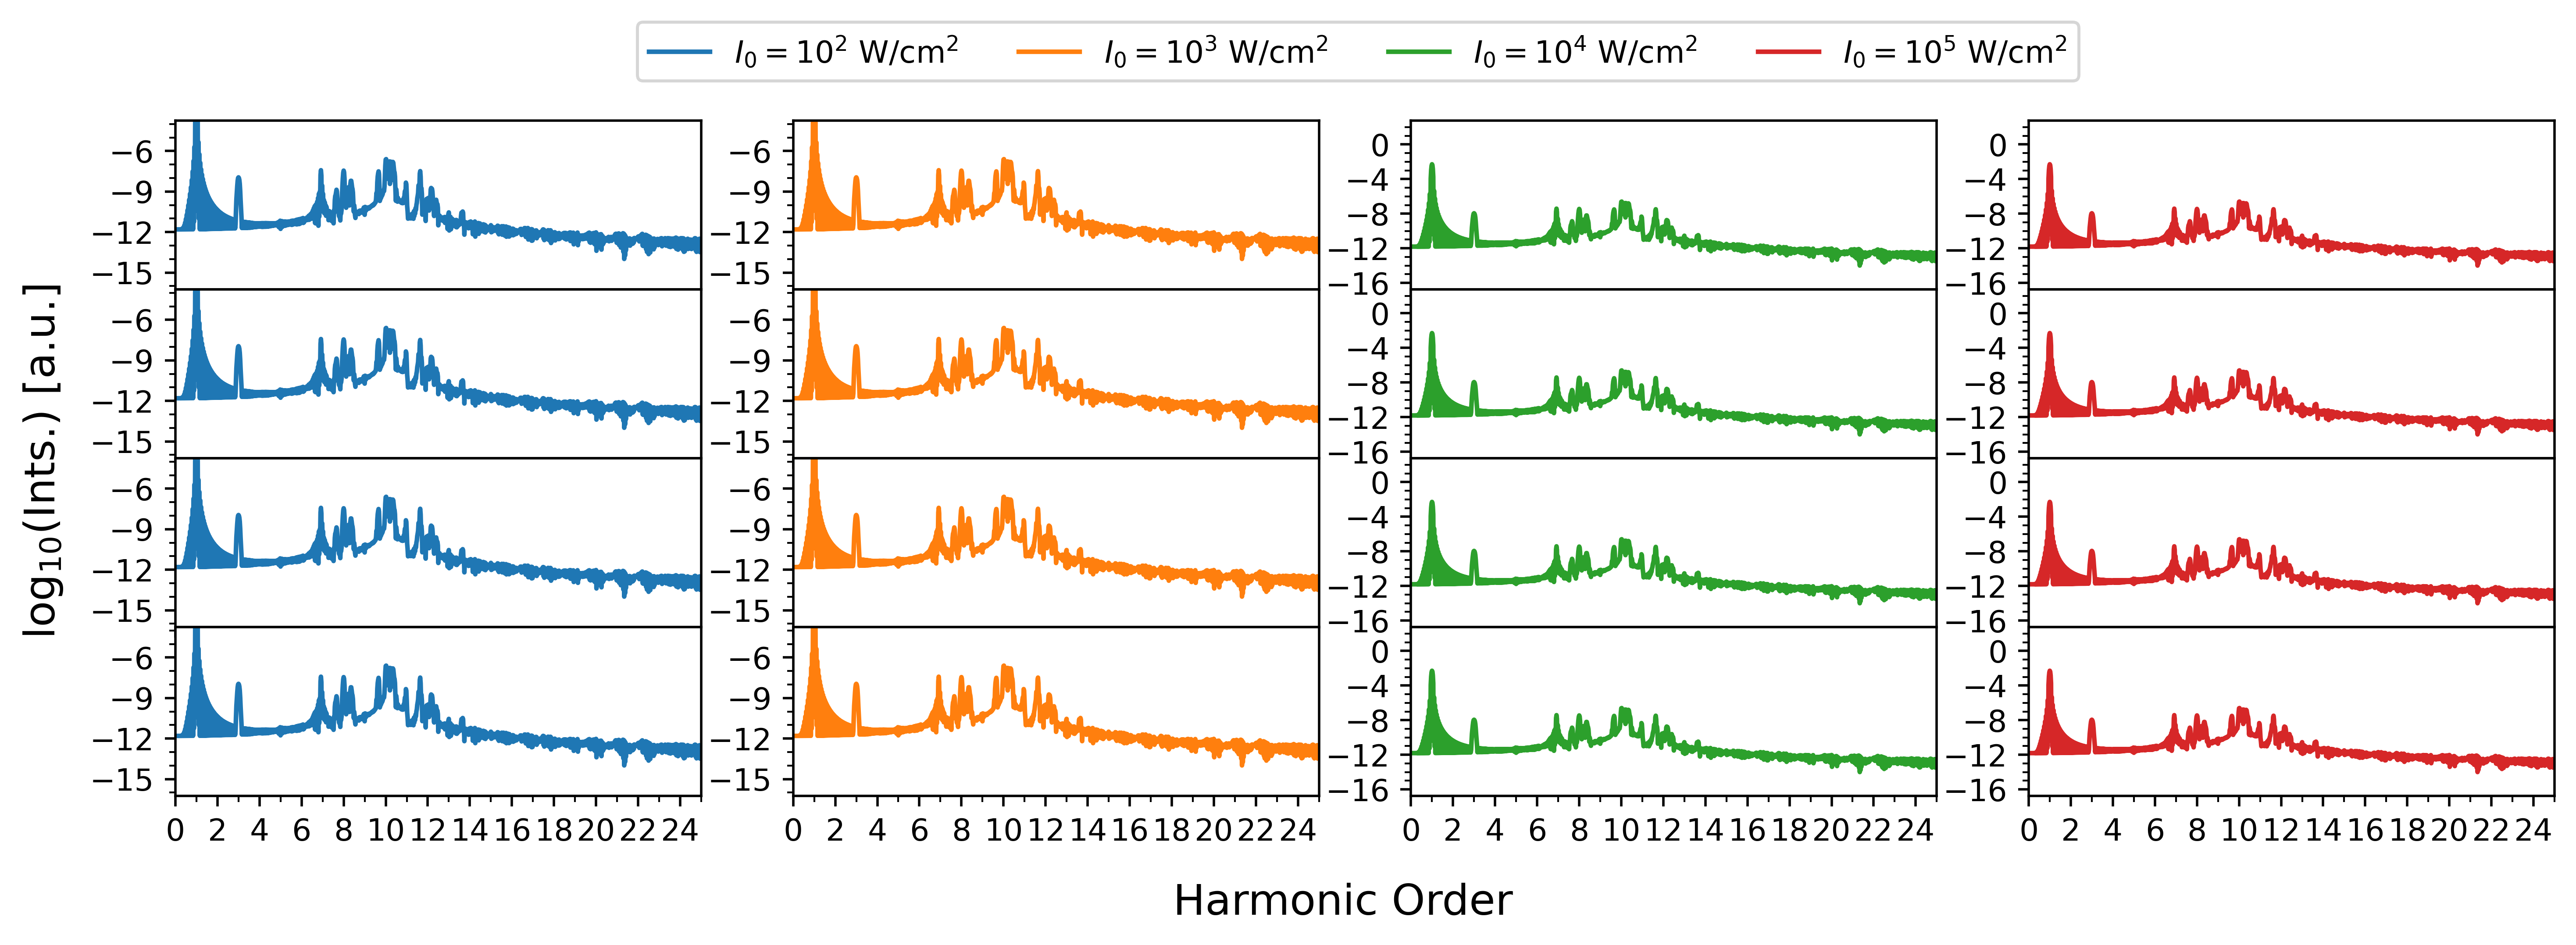

In [39]:
fig, axs = plt.subplots(ncols = 4, nrows = 4, sharex=True, sharey=False)
fig.subplots_adjust(hspace = 0, wspace=0.175)
fig.set_size_inches(14,4)
fig.set_dpi(500)

for i, width in enumerate(Widths):
    axs[i][0].set_ylim(-16.25, -3.75); axs[i][0].yaxis.set_major_locator(MultipleLocator(3))
    axs[i][1].set_ylim(-16.25, -3.75); axs[i][1].yaxis.set_major_locator(MultipleLocator(3))
    axs[i][2].set_ylim(-16.75, 2.75); axs[i][2].yaxis.set_major_locator(MultipleLocator(4))
    axs[i][3].set_ylim(-16.75, 2.75); axs[i][3].yaxis.set_major_locator(MultipleLocator(4))
    for j, ints in enumerate(intensities):
        axs[i][j].xaxis.set_minor_locator(MultipleLocator(1))
        axs[i][j].yaxis.set_minor_locator(MultipleLocator(1))
        
        axs[i][j].xaxis.set_major_locator(MultipleLocator(2))
        
        if i == 0:
            
            axs[i][j].plot(harm_spec[width][ints][:,0]/omega, 
                           np.log10(
                               harm_spec[width][ints][:,1],
                               ), 
                           color = cm(j), 
                           label = r'$I_{0} = 10^{%s}$ W/cm$^{2}$' % (ints[-1:]))
            axs[i][j].set_xlim(0,25)
        else:
            axs[i][j].plot(harm_spec[width][ints][:,0]/omega, 
                           np.log10(
                               harm_spec[width][ints][:,1],
                               ), 
                           color = cm(j))
            axs[i][j].set_xlim(0,25)
fig.legend(bbox_to_anchor = [0.75, 1.01], ncol = 4)
fig.text(0.075, 0.3, 'log$_{10}$(Ints.) [a.u.]',
         rotation='vertical',
         fontsize = 14)
fig.text(0.45, -0.025, 'Harmonic Order', fontsize = 14)
plt.show()

# Simulation Parameters and Results


## In this investigation, I am exploring the variation in ionisation probability and harmonic spectra as a function of the inclusion of a mask function, its size, and the box radius being used.

Below, I am using a mask for absorbing boundaries

### Box-size radius:
  - In each of these subsequent sets of calculations, the box size is fixed, and the mask function varied in radius for its cutoff. At each mask geometry, the laser profile is logarithmically varied between $10^{12}$ and $10^{15}$ $W/cm^{2}$.


## Radius = 100 bohr:

  # Mask Dimensions
  - [ ] **Mask 1:**
    - Dimensions: Width 25 bohr
    - Ground state calculations done. Need only apply tddft calculations.
    - Results: Going by laser intensity:
      - $I_{max} = 10^{12} W/cm^{2}$ [ ]
      - $I_{max} = 10^{13} W/cm^{2}$ [ ]
      - $I_{max} = 10^{14} W/cm^{2}$ [ ]
      - $I_{max} = 10^{15} W/cm^{2}$ [ ]

  - [x] **Mask 2:**
    - Dimensions: Width 50 bohr
    - Results: Going by laser intensity:
      - $I_{max} = 10^{12} W/cm^{2}$ [x]
      - $I_{max} = 10^{13} W/cm^{2}$ [x]
      - $I_{max} = 10^{14} W/cm^{2}$ [x]
      - $I_{max} = 10^{15} W/cm^{2}$ [x]

  - [x] **Mask 3:**
    - Dimensions: Width 75 bohr
    - Results: Going by laser intensity:
      - $I_{max} = 10^{12} W/cm^{2}$ [x]
      - $I_{max} = 10^{13} W/cm^{2}$ [x]
      - $I_{max} = 10^{14} W/cm^{2}$ [x]
      - $I_{max} = 10^{15} W/cm^{2}$ [x]

  - [x] **Mask 4:**
    - Dimensions: Width 100 bohr
    - Ground state calculations done. Need only apply tddft calculations.
    - Results: Going by laser intensity:
      - $I_{max} = 10^{12} W/cm^{2}$ [x]
      - $I_{max} = 10^{13} W/cm^{2}$ [x] 
      - $I_{max} = 10^{14} W/cm^{2}$ [x]
      - $I_{max} = 10^{15} W/cm^{2}$ [x]

Radius = 200 bohr:

  ## Mask Dimensions
  - [x] **Mask 1:**
    - Dimensions: Width 25 bohr
    - Ground state calculations done. Need only apply tddft calculations.
    - Results: Going by laser intensity:
      - $I_{max} = 10^{12} W/cm^{2}$ [x]
      - $I_{max} = 10^{13} W/cm^{2}$ [x]
      - $I_{max} = 10^{14} W/cm^{2}$ [x]
      - $I_{max} = 10^{15} W/cm^{2}$ [x]

  - [x] **Mask 2:**
    - Dimensions: Width 50 bohr
    - Results: Going by laser intensity:
      - $I_{max} = 10^{12} W/cm^{2}$ [x]
      - $I_{max} = 10^{13} W/cm^{2}$ [x]
      - $I_{max} = 10^{14} W/cm^{2}$ [x]
      - $I_{max} = 10^{15} W/cm^{2}$ [x]

  - [x] **Mask 3:**
    - Dimensions: Width 75 bohr
    - Results: Going by laser intensity:
      - $I_{max} = 10^{12} W/cm^{2}$ [x]
      - $I_{max} = 10^{13} W/cm^{2}$ [x]
      - $I_{max} = 10^{14} W/cm^{2}$ [x]
      - $I_{max} = 10^{15} W/cm^{2}$ [x]

  - [x] **Mask 4:**
    - Dimensions: Width 100 bohr
    - Ground state calculations done. Need only apply tddft calculations.
    - Results: Going by laser intensity:
      - $I_{max} = 10^{12} W/cm^{2}$ [x]
      - $I_{max} = 10^{13} W/cm^{2}$ [x] 
      - $I_{max} = 10^{14} W/cm^{2}$ [x]
      - $I_{max} = 10^{15} W/cm^{2}$ [x]

Radius = 300 bohr:

  ## Mask Dimensions
  - [x] **Mask 1:**
    - Dimensions: Width 25 bohr
    - Ground state calculations done. Need only apply tddft calculations.
    - Results: Going by laser intensity:
      - $I_{max} = 10^{12} W/cm^{2}$ [x]
      - $I_{max} = 10^{13} W/cm^{2}$ [x]
      - $I_{max} = 10^{14} W/cm^{2}$ [x]
      - $I_{max} = 10^{15} W/cm^{2}$ [x]

  - [x] **Mask 2:**
    - Dimensions: Width 50 bohr
    - Results: Going by laser intensity:
      - $I_{max} = 10^{12} W/cm^{2}$ [x]
      - $I_{max} = 10^{13} W/cm^{2}$ [x]
      - $I_{max} = 10^{14} W/cm^{2}$ [x]
      - $I_{max} = 10^{15} W/cm^{2}$ [x]

  - [x] **Mask 3:**
    - Dimensions: Width 75 bohr
    - Results: Going by laser intensity:
      - $I_{max} = 10^{12} W/cm^{2}$ [x]
      - $I_{max} = 10^{13} W/cm^{2}$ [x]
      - $I_{max} = 10^{14} W/cm^{2}$ [x]
      - $I_{max} = 10^{15} W/cm^{2}$ [x]

  - [x] **Mask 4:**
    - Dimensions: Width 100 bohr
    - Ground state calculations done. Need only apply tddft calculations.
    - Results: Going by laser intensity:
      - $I_{max} = 10^{12} W/cm^{2}$ [x]
      - $I_{max} = 10^{13} W/cm^{2}$ [x] 
      - $I_{max} = 10^{14} W/cm^{2}$ [x]
      - $I_{max} = 10^{15} W/cm^{2}$ [x]

Radius = 400 bohr:

  ## Mask Dimensions
  - [ ] **Mask 1:**
    - Dimensions: Width 25 bohr
    - Ground state calculations done. Need only apply tddft calculations.
    - Results: Going by laser intensity:
      - $I_{max} = 10^{12} W/cm^{2}$ [ ]
      - $I_{max} = 10^{13} W/cm^{2}$ [ ]
      - $I_{max} = 10^{14} W/cm^{2}$ [ ]
      - $I_{max} = 10^{15} W/cm^{2}$ [ ]

  - [ ] **Mask 2:**
    - Dimensions: Width 50 bohr
    - Results: Going by laser intensity:
      - $I_{max} = 10^{12} W/cm^{2}$ [ ]
      - $I_{max} = 10^{13} W/cm^{2}$ [ ]
      - $I_{max} = 10^{14} W/cm^{2}$ [ ]
      - $I_{max} = 10^{15} W/cm^{2}$ [ ]

  - [ ] **Mask 3:**
    - Dimensions: Width 75 bohr
    - Results: Going by laser intensity:
      - $I_{max} = 10^{12} W/cm^{2}$ [ ]
      - $I_{max} = 10^{13} W/cm^{2}$ [ ]
      - $I_{max} = 10^{14} W/cm^{2}$ [ ]
      - $I_{max} = 10^{15} W/cm^{2}$ [ ]

  - [ ] **Mask 4:**
    - Dimensions: Width 100 bohr
    - Ground state calculations done. Need only apply tddft calculations.
    - Results: Going by laser intensity:
      - $I_{max} = 10^{12} W/cm^{2}$ [ ]
      - $I_{max} = 10^{13} W/cm^{2}$ [ ] 
      - $I_{max} = 10^{14} W/cm^{2}$ [ ]
      - $I_{max} = 10^{15} W/cm^{2}$ [ ]

Radius = 500 bohr:

  ## Mask Dimensions
  - [ ] **Mask 1:**
    - Dimensions: Width 25 bohr
    - Ground state calculations done. Need only apply tddft calculations.
    - Results: Going by laser intensity:
      - $I_{max} = 10^{12} W/cm^{2}$ [ ]
      - $I_{max} = 10^{13} W/cm^{2}$ [ ]
      - $I_{max} = 10^{14} W/cm^{2}$ [ ]
      - $I_{max} = 10^{15} W/cm^{2}$ [ ]

  - [ ] **Mask 2:**
    - Dimensions: Width 50 bohr
    - Results: Going by laser intensity:
      - $I_{max} = 10^{12} W/cm^{2}$ [ ]
      - $I_{max} = 10^{13} W/cm^{2}$ [ ]
      - $I_{max} = 10^{14} W/cm^{2}$ [ ]
      - $I_{max} = 10^{15} W/cm^{2}$ [ ]

  - [ ] **Mask 3:**
    - Dimensions: Width 75 bohr
    - Results: Going by laser intensity:
      - $I_{max} = 10^{12} W/cm^{2}$ [ ]
      - $I_{max} = 10^{13} W/cm^{2}$ [ ]
      - $I_{max} = 10^{14} W/cm^{2}$ [ ]
      - $I_{max} = 10^{15} W/cm^{2}$ [ ]

  - [ ] **Mask 4:**
    - Dimensions: Width 100 bohr
    - Ground state calculations done. Need only apply tddft calculations.
    - Results: Going by laser intensity:
      - $I_{max} = 10^{12} W/cm^{2}$ [ ]
      - $I_{max} = 10^{13} W/cm^{2}$ [ ] 
      - $I_{max} = 10^{14} W/cm^{2}$ [ ]
      - $I_{max} = 10^{15} W/cm^{2}$ [ ]

For these subsequent calculations, no mask has been applied. But the box size radius has been varied between 100 and 500 bohr. 

## Simulation Box Size
- [ ] **Box Size 1:**
  - Dimensions: [Specify dimensions]
  - Results: [Document corresponding simulation results]

- [ ] **Box Size 2:**
  - Dimensions: [Specify dimensions]
  - Results: [Document corresponding simulation results]

- [ ] **Box Size 3:**
  - Dimensions: [Specify dimensions]
  - Results: [Document corresponding simulation results]
